#### TESTBED SOIL C PLOTS
- reads in MIMICS results from run archived CRU_NCEP CLM4.5 simulations
- /project/tss/wwieder/CASACLM/GRID/OUTPUT_GRID_CRU_NCEP/MIMICS_HIST
- plots zonal distributions of fluxes

In [1]:
import xarray as xr
import cf_units as cf
import numpy as np
import pandas as pd
import esmlab
from ctsm_py import utils
import warnings
warnings.simplefilter("ignore", category=RuntimeWarning)

# some resources for plotting
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.lines as mlines
%matplotlib inline

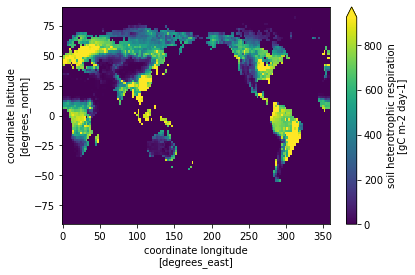

In [13]:
dINmim = '/glade/scratch/wwieder/mimics_pool_flux_2010_daily.nc'
dINcas   = '/glade/scratch/wwieder/casaclm_pool_flux_2010_daily.nc'
dsMIM  = utils.time_set_mid(xr.open_mfdataset(dINmim, decode_times=True, combine='by_coords'), 'time')
dsCAS  = utils.time_set_mid(xr.open_mfdataset(dINcas, decode_times=True, combine='by_coords'), 'time')
ds = dsCAS

ds['cHresp']  =  dsMIM.cHresp  # just bring over MIM HR  fluxes
ds.cHresp.sum(dim='time').plot(robust=True);

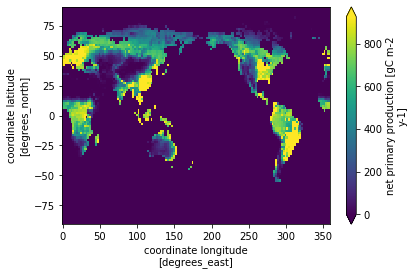

In [26]:
ann_ds = ds.sum(dim='time')  #sum over time for annual fluxes
var  =  ['cHresp','cresp','cnpp', 'cgpp']
varLong  =  ['Rh_mim','Rh_cas','npp', 'gpp']
for i in range(len(var)):
    ann_ds.get(var[i]).attrs['units'] = 'gC m-2 y-1'

ann_ds.cnpp.plot(robust=True)

# sum up fluxes
ann_flux = ann_ds * ann_ds.landarea *1e6
for i in range(len(var)):
    ann_flux.get(var[i]).attrs['units'] = 'gC y-1'

56.325317811240964


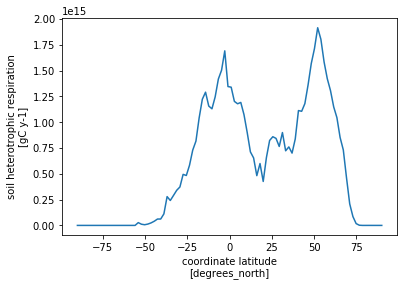

In [23]:
print(ann_flux.get(var[0]).values.sum()*1e-15) #convert gC to PgC
zon_sum = ann_flux.sum(dim='lon')
zon_sum.cHresp.plot();

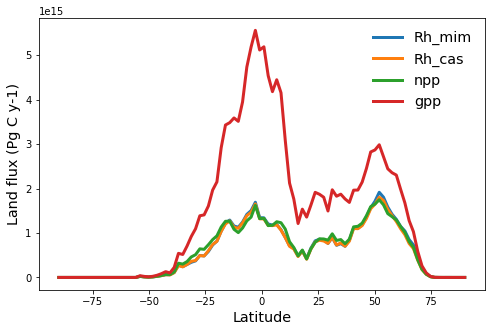

In [30]:
plt.figure(figsize=[8,5])
#plt.ylabel('Change Global Land C ('+g585y.units+')', fontsize='x-large')
for i in range(len(var)):
    plt.plot(zon_sum.lat, zon_sum.get(var[i]), lw=3)

plt.legend(labels=(varLong), frameon = False, fontsize='x-large')
plt.ylabel('Land flux (Pg C y-1)', fontsize='x-large')
plt.xlabel('Latitude', fontsize='x-large');
#plt.hlines(y=0, xmin=1850, xmax=2300, linestyles='dashed')
#plt.title('CESM2-WACCM Land C uptake', fontsize='x-large');
